In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(1)

In [2]:
#load data
data = pd.read_excel('Welding_Data.xlsx') #using pandas to load the excel file
data = data.dropna(axis=0, how='any') #drop nan from the data

# prepare variables and target
X = data.loc[:,['Current','Angle','Speed']] #Variables, or using data.iloc[:,1:4]
Y = data.loc[:,'Height'] # Target
X = X.to_numpy() #conver data frame to numpy array
Y = Y.to_numpy()

# data normalization, normalization to [0 1] range
X_Norm = np.empty_like(X)
for i in range(X.shape[1]):
   data_ = X[:,i]
   X_Norm[:,i] = (data_-np.amin(data_))/(np.amax(data_)-np.amin(data_)) 
    
# normalize Y data
Y_Min = np.amin(Y)
Y_Max = np.amax(Y)
Y_Norm = (Y-Y_Min)/(Y_Max-Y_Min)

In [3]:
# split training and testing data

index = np.arange(len(Y_Norm))
np.random.shuffle(index) #disorder the original data

m = np.ceil(0.7*len(Y)) # 70% for training and 30% for testing
m = int(m) #covert float type to int type
X_Train = X_Norm[index[:m]]
Y_Train = Y_Norm[index[:m]]

X_Test = X_Norm[index[m:]]
Y_Test = Y_Norm[index[m:]]

In [4]:
# define sigmoid function and sigmoid derivative
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y
def sigmoid_derivative(y):
    return y*(1-y)

In [5]:
class NeuralNetwork():
    def __init__(self, x, y, layer_numbers, learning_rate, epochs): #layer_numbers = [3, 2*3+1=7,1]
        self.input = x
        self.y = y
        self.layer_numbers = layer_numbers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.Weights0 = np.random.rand(self.layer_numbers[0],self.layer_numbers[1]) #W0: 3*7
        self.Weights1 = np.random.rand(self.layer_numbers[1],self.layer_numbers[2]) #W1: 7*1
        self.epoch = []
        self.error_history = []
    
    def forward(self):
        self.hidden_output = sigmoid(np.dot(self.input,self.Weights0))   #calculate the hidden neuron values, np.dot vector based multiplication
        self.output = sigmoid(np.dot(self.hidden_output,self.Weights1))  #calculate the output neuron values
    
    def backpropagation(self):
        self.error = np.average(np.abs(self.y-self.output)) #sum(|Yactual-Y|)/No.(Y) 100*1
        d_Weights1 = np.dot(self.hidden_output.T,(self.output-self.y)*sigmoid_derivative(self.output))             #gradient for W1: H'*(Yactual-Y)*sigmoid'(Y)
        layer_error1 = np.dot((self.output-self.y)*sigmoid_derivative(self.output), self.Weights1.T) #partile derivative w.r.t H (Yactual)*sigmoid'(Y)*W1'
        d_Weights0 = np.dot(self.input.T,layer_error1*sigmoid_derivative(self.hidden_output)) #gradient for W0  dJ/dW0 = (dJ/dY)(dY/dH)(dH/dW0) = X'*layer_error1*sigmoid'(H)
        
        self.Weights0 = self.Weights0 - self.learning_rate*d_Weights0 #update W0
        self.Weights1 = self.Weights1 - self.learning_rate*d_Weights1 #update W1
    
    def train(self):
        for epoch in range(self.epochs):
            self.forward()
            self.backpropagation()
            self.epoch.append(epoch) #np.arrange(epochs)
            self.error_history.append(self.error)
    
    def predict(self,new_data):
        hidden_output = sigmoid(np.dot(new_data,self.Weights0))   #calculate the hidden neuron values, np.dot vector based multiplication
        output = sigmoid(np.dot(hidden_output,self.Weights1)) 
        return output
           

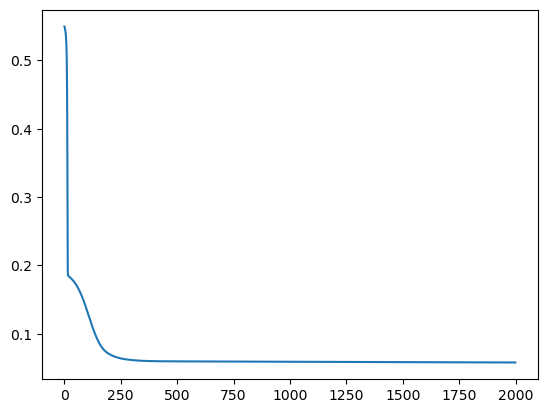

In [6]:
layer_numbers = [3,10,1]
learning_rate = 0.01
epochs = 2000
Y_Train = np.reshape(Y_Train,(len(Y_Train),1))
Net = NeuralNetwork(X_Train, Y_Train, layer_numbers, learning_rate, epochs) #define an object belonging to the class
Net.train()
plt.figure()
plt.plot(Net.epoch, Net.error_history)



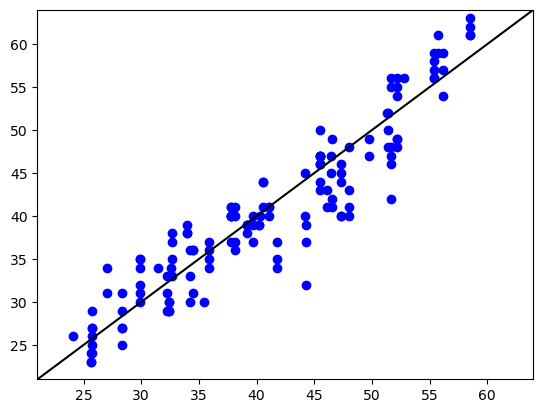

In [7]:
# testing 
y_predict = Net.predict(X_Test)
y_predicted = y_predict * (Y_Max - Y_Min) + Y_Min
Y_Test = Y_Test * (Y_Max - Y_Min) + Y_Min
Y_Test = Y_Test.reshape(len(Y_Test),1)
plt.scatter(y_predicted, Y_Test, c = 'b',marker = 'o')
plt.xlim(Y_Min, Y_Max)
plt.ylim(Y_Min, Y_Max)
plt.plot([Y_Min, Y_Max],[Y_Min, Y_Max],'k-')

In [8]:
# performance evaluation
def r2(y_predicted,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_predicted-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
r2(y_predicted, Y_Test)

0.8680315057531698